<function matplotlib.pyplot.show(close=None, block=None)>

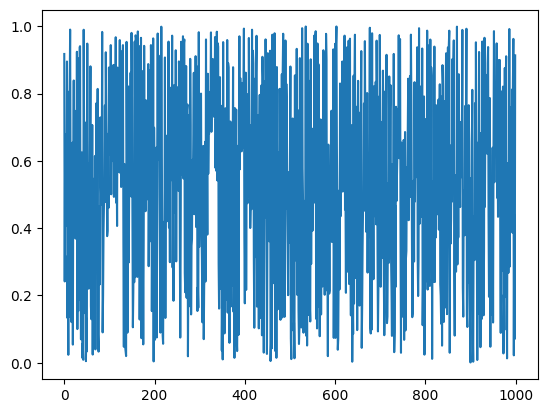

In [2]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt

def Itamaraca(N = 1):
    """
    Psuedo-random number generator using absolute value functions
    Technique by
    Henrique Pereira, D. (2022). Itamaracá: A Novel Simple Way to Generate Pseudo-random Numbers. Cambridge Open Engage. doi:10.33774/coe-2022-zsw6t 
    
    Seed generation method from
    https://www.youtube.com/watch?v=zHZx9ByTo2s
    
    Generates a list of random numbers from 0 < x < 1 
    Args:
    N int:
        number of iterations, returns int if 1, returns list if greater than 1
        default is set to 1
    """
    #any number here, more precision with larger numbers
    m = 2**31
    #seed generation, needs 3 numbers smaller then m
    #gets number from time muiltiplied by processing id, then takes the modulus of m to get a number less then m
    #random factors added to generate diffrent numbers
    snlist = [int(time.time()*os.getpid())%m, int(time.time()*os.getpid()*15)%m,int(time.time()*os.getpid()*73)%m]

    #case for single number
    if N  == 1:
        p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
        #needs square root of number between 1<x<4
        #used pi for the squareroot variable 
        FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
        return FN/m
    
    #case for list of numbers
    elif N > 1:
        p = 0 
        FN = 0
        results = []
        for i in range(N):
            p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
            #needs square root of number between 1<x<4
            FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
            #dividing FN/n gives you a float ranging from 0 < x < 1
            results.append(FN/m)
            #adds FN to newest sn number, then pops oldest number
            snlist.append(FN)
            snlist.pop(0)
        return results
    #error case
    else:
        print("ERROR: N < 0, Has to be greater than 1")

results = Itamaraca(1000)
x = range(len(results))
plt.plot(x, results)
plt.show